In [1]:
import pandas as pd
from cluster_comparison import perform_umap, perform_hdbscan, calculate_silhouette
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed

In [2]:
# Sample data and demographics DataFrames, replace these with your actual DataFrames
raw_data = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/cleaned_data_SYMPTOMS_9_13_23_DNA.csv')
data_symp_groups = pd.read_csv('data/skew_corr_groupadd.csv', usecols=['Grouped_Neuro_Sensory', 'Grouped_Cognitive_Memory', 'Grouped_Gastrointestinal', 'Grouped_Respiratory_Cardiac', 'Grouped_Eye_Vision'])
data_symp_groups_all = pd.read_csv('data/skew_corr_groupadd.csv')
demographics = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/non_binary_data_processed.csv')

# combine demographics and data_symp_group_all 
demo_all = pd.concat([demographics, data_symp_groups_all], axis=1)

# combine demographics and data_symp_group
demo_groups = pd.concat([demographics, data_symp_groups], axis=1)

number of features: 112


Generations:   0%|          | 0/100 [00:00<?, ?it/s]/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo


Top 5 individuals in generation 1:
  Genome: (0.7678958626578548, 0.03844177036710581, 28, 46), Fitness: 0.8611335754394531
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=28, n_components=46
  Genome: (0.6715557657688107, 0.04623068700341282, 31, 50), Fitness: 0.856637179851532
    n_neighbors=0.6715557657688107, min_dist=0.04623068700341282, min_cluster_size=31, n_components=50
  Genome: (0.6757706356698308, 0.04030749239323905, 38, 35), Fitness: 0.8559970855712891
    n_neighbors=0.6757706356698308, min_dist=0.04030749239323905, min_cluster_size=38, n_components=35
  Genome: (0.6492373060806188, 0.03733592291556887, 29, 47), Fitness: 0.8545005321502686
    n_neighbors=0.6492373060806188, min_dist=0.03733592291556887, min_cluster_size=29, n_components=47
  Genome: (0.6492373060806188, 0.03733592291556887, 29, 47), Fitness: 0.8540733456611633
    n_neighbors=0.6492373060806188, min_dist=0.03733592291556887, min_cluster_size=29, n_components=47
Numbe

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 2:
  Genome: (0.5904392254749018, 0.03350746977410861, 28, 48), Fitness: 0.8512187004089355
    n_neighbors=0.5904392254749018, min_dist=0.03350746977410861, min_cluster_size=28, n_components=48
  Genome: (0.6635108666306176, 0.03771926169676367, 37, 37), Fitness: 0.8500671982765198
    n_neighbors=0.6635108666306176, min_dist=0.03771926169676367, min_cluster_size=37, n_components=37
  Genome: (0.7392822484970554, 0.03177584304061573, 29, 47), Fitness: 0.8494434356689453
    n_neighbors=0.7392822484970554, min_dist=0.03177584304061573, min_cluster_size=29, n_components=47
  Genome: (0.8029379949297872, 0.0435887610337033, 31, 50), Fitness: 0.848727822303772
    n_neighbors=0.8029379949297872, min_dist=0.0435887610337033, min_cluster_size=31, n_components=50
  Genome: (0.6757706356698308, 0.04030749239323905, 38, 35), Fitness: 0.8436939120292664
    n_neighbors=0.6757706356698308, min_dist=0.04030749239323905, min_cluster_size=38, n_components=35
Number 

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 3:
  Genome: (0.7392822484970554, 0.03177584304061573, 39, 46), Fitness: 0.8458994030952454
    n_neighbors=0.7392822484970554, min_dist=0.03177584304061573, min_cluster_size=39, n_components=46
  Genome: (0.7392822484970554, 0.03177584304061573, 29, 55), Fitness: 0.836367130279541
    n_neighbors=0.7392822484970554, min_dist=0.03177584304061573, min_cluster_size=29, n_components=55
  Genome: (0.6059152401358038, 0.0422381241263205, 37, 34), Fitness: 0.8353167176246643
    n_neighbors=0.6059152401358038, min_dist=0.0422381241263205, min_cluster_size=37, n_components=34
  Genome: (0.6757706356698308, 0.04030749239323905, 38, 34), Fitness: 0.8349705338478088
    n_neighbors=0.6757706356698308, min_dist=0.04030749239323905, min_cluster_size=38, n_components=34
  Genome: (0.5904392254749018, 0.03350746977410861, 43, 57), Fitness: 0.8328384757041931
    n_neighbors=0.5904392254749018, min_dist=0.03350746977410861, min_cluster_size=43, n_components=57
Number 

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 4:
  Genome: (0.6757706356698308, 0.04030749239323905, 38, 57), Fitness: 0.8588200807571411
    n_neighbors=0.6757706356698308, min_dist=0.04030749239323905, min_cluster_size=38, n_components=57
  Genome: (0.7392822484970554, 0.03177584304061573, 29, 48), Fitness: 0.8550143837928772
    n_neighbors=0.7392822484970554, min_dist=0.03177584304061573, min_cluster_size=29, n_components=48
  Genome: (0.5904392254749018, 0.03350746977410861, 43, 57), Fitness: 0.8527120351791382
    n_neighbors=0.5904392254749018, min_dist=0.03350746977410861, min_cluster_size=43, n_components=57
  Genome: (0.7554533629508307, 0.04806465793587499, 29, 62), Fitness: 0.8507515788078308
    n_neighbors=0.7554533629508307, min_dist=0.04806465793587499, min_cluster_size=29, n_components=62
  Genome: (0.7392822484970554, 0.0422381241263205, 29, 48), Fitness: 0.8500593900680542
    n_neighbors=0.7392822484970554, min_dist=0.0422381241263205, min_cluster_size=29, n_components=48
Number

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 5:
  Genome: (0.5904392254749018, 0.03177584304061573, 29, 57), Fitness: 0.8582141399383545
    n_neighbors=0.5904392254749018, min_dist=0.03177584304061573, min_cluster_size=29, n_components=57
  Genome: (0.5904392254749018, 0.03350746977410861, 43, 57), Fitness: 0.8542410731315613
    n_neighbors=0.5904392254749018, min_dist=0.03350746977410861, min_cluster_size=43, n_components=57
  Genome: (0.5904392254749018, 0.03350746977410861, 30, 57), Fitness: 0.8505810499191284
    n_neighbors=0.5904392254749018, min_dist=0.03350746977410861, min_cluster_size=30, n_components=57
  Genome: (0.7392822484970554, 0.03177584304061573, 39, 35), Fitness: 0.8473021388053894
    n_neighbors=0.7392822484970554, min_dist=0.03177584304061573, min_cluster_size=39, n_components=35
  Genome: (0.6404813906327573, 0.03350746977410861, 43, 57), Fitness: 0.8454492092132568
    n_neighbors=0.6404813906327573, min_dist=0.03350746977410861, min_cluster_size=43, n_components=57
Numb

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 6:
  Genome: (0.6404813906327573, 0.0435887610337033, 31, 37), Fitness: 0.8536759614944458
    n_neighbors=0.6404813906327573, min_dist=0.0435887610337033, min_cluster_size=31, n_components=37
  Genome: (1.6934414128059132, 0.03350746977410861, 43, 57), Fitness: 0.8460496068000793
    n_neighbors=1.6934414128059132, min_dist=0.03350746977410861, min_cluster_size=43, n_components=57
  Genome: (0.7392822484970554, 0.0422381241263205, 37, 50), Fitness: 0.8450733423233032
    n_neighbors=0.7392822484970554, min_dist=0.0422381241263205, min_cluster_size=37, n_components=50
  Genome: (0.6059152401358038, 0.0422381241263205, 38, 57), Fitness: 0.8448429107666016
    n_neighbors=0.6059152401358038, min_dist=0.0422381241263205, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 38, 57), Fitness: 0.8434270620346069
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=38, n_components=57
Number of 

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:   7%|▋         | 7/100 [38:03<8:15:21, 319.59s/it]


Top 5 individuals in generation 7:
  Genome: (0.6059152401358038, 0.0422381241263205, 37, 34), Fitness: 0.8654882907867432
    n_neighbors=0.6059152401358038, min_dist=0.0422381241263205, min_cluster_size=37, n_components=34
  Genome: (1.6934414128059132, 0.0422381241263205, 37, 57), Fitness: 0.8631347417831421
    n_neighbors=1.6934414128059132, min_dist=0.0422381241263205, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 38, 57), Fitness: 0.8504074215888977
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=38, n_components=57
  Genome: (0.7392822484970554, 0.0422381241263205, 37, 46), Fitness: 0.8489060997962952
    n_neighbors=0.7392822484970554, min_dist=0.0422381241263205, min_cluster_size=37, n_components=46
  Genome: (0.6404813906327573, 0.03177584304061573, 29, 57), Fitness: 0.848617434501648
    n_neighbors=0.6404813906327573, min_dist=0.03177584304061573, min_cluster_size=29, n_components=57
Number of m

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 8:
  Genome: (0.6404813906327573, 0.03177584304061573, 29, 50), Fitness: 0.8623820543289185
    n_neighbors=0.6404813906327573, min_dist=0.03177584304061573, min_cluster_size=29, n_components=50
  Genome: (0.4938833583805772, 0.0435887610337033, 31, 57), Fitness: 0.8597278594970703
    n_neighbors=0.4938833583805772, min_dist=0.0435887610337033, min_cluster_size=31, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 25), Fitness: 0.8401975035667419
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=25
  Genome: (0.7678958626578548, 0.03844177036710581, 38, 46), Fitness: 0.8367317914962769
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=38, n_components=46
  Genome: (0.6404813906327573, 0.0435887610337033, 31, 50), Fitness: 0.8292064666748047
    n_neighbors=0.6404813906327573, min_dist=0.0435887610337033, min_cluster_size=31, n_components=50
Number o

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 9:
  Genome: (0.6635108666306176, 0.03844177036710581, 37, 57), Fitness: 0.8595012426376343
    n_neighbors=0.6635108666306176, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6404813906327573, 0.03177584304061573, 29, 50), Fitness: 0.8503705859184265
    n_neighbors=0.6404813906327573, min_dist=0.03177584304061573, min_cluster_size=29, n_components=50
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.840777575969696
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6635108666306176, 0.03177584304061573, 29, 25), Fitness: 0.8303232789039612
    n_neighbors=0.6635108666306176, min_dist=0.03177584304061573, min_cluster_size=29, n_components=25
  Genome: (0.7678958626578548, 0.03844177036710581, 28, 57), Fitness: 0.8268870115280151
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=28, n_components=57
Numbe

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 10:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8513985872268677
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6635108666306176, 0.03177584304061573, 29, 57), Fitness: 0.8475677371025085
    n_neighbors=0.6635108666306176, min_dist=0.03177584304061573, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8474516868591309
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6635108666306176, 0.03844177036710581, 20, 57), Fitness: 0.8421897292137146
    n_neighbors=0.6635108666306176, min_dist=0.03844177036710581, min_cluster_size=20, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8394283652305603
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 11:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8567786812782288
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 21, 57), Fitness: 0.849372386932373
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=21, n_components=57
  Genome: (0.7445983185509026, 0.0435887610337033, 38, 46), Fitness: 0.8433758020401001
    n_neighbors=0.7445983185509026, min_dist=0.0435887610337033, min_cluster_size=38, n_components=46
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8407731652259827
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.838728666305542
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Number 

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 12:
  Genome: (0.6635108666306176, 0.03844177036710581, 20, 57), Fitness: 0.8708544373512268
    n_neighbors=0.6635108666306176, min_dist=0.03844177036710581, min_cluster_size=20, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8557413816452026
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 38, 46), Fitness: 0.8506060242652893
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=38, n_components=46
  Genome: (0.7678958626578548, 0.0422381241263205, 37, 57), Fitness: 0.849948525428772
    n_neighbors=0.7678958626578548, min_dist=0.0422381241263205, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8485780358314514
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Number

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 13:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8601310849189758
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8557505011558533
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8478894829750061
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8472850322723389
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6635108666306176, 0.03844177036710581, 20, 57), Fitness: 0.8413370251655579
    n_neighbors=0.6635108666306176, min_dist=0.03844177036710581, min_cluster_size=20, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 14:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8506743311882019
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8481754064559937
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8426002860069275
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 29, 57), Fitness: 0.8397502303123474
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8394433259963989
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 15:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8662384748458862
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.9564554589518063, 0.03844177036710581, 37, 57), Fitness: 0.8605756163597107
    n_neighbors=0.9564554589518063, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8480432033538818
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8466509580612183
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 43, 57), Fitness: 0.8457210063934326
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 16:
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8552191257476807
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8509185314178467
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8492159247398376
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8458304405212402
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8368318676948547
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 17:
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8562535047531128
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8537309765815735
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8482153415679932
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8453501462936401
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8425233364105225
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 18:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8684197068214417
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8608134984970093
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.855705976486206
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8539928793907166
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8490004539489746
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Numb

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 19:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8648179173469543
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8594873547554016
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8550962209701538
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8486144542694092
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.845766544342041
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Numb

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  20%|██        | 20/100 [1:32:17<4:34:18, 205.73s/it]


Top 5 individuals in generation 20:
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8749494552612305
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8574259877204895
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8518738150596619
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8503463864326477
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8463416695594788
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 21:
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8695717453956604
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.862673819065094
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.854764997959137
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8521119952201843
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8475425243377686
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Numbe

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 22:
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8555051684379578
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8552791476249695
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 23, 57), Fitness: 0.8515897393226624
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=23, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8490146398544312
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8487204313278198
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  23%|██▎       | 23/100 [1:44:01<5:00:10, 233.90s/it]


Top 5 individuals in generation 23:
  Genome: (0.6059152401358038, 0.03844177036710581, 43, 57), Fitness: 0.859652042388916
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8455668687820435
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 23, 57), Fitness: 0.8432244062423706
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=23, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.841471791267395
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8410404324531555
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Numbe

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  24%|██▍       | 24/100 [1:46:18<4:19:47, 205.10s/it]


Top 5 individuals in generation 24:
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8622812032699585
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8613002896308899
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.8470020294189453
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7954468832648788, 0.03844177036710581, 37, 57), Fitness: 0.8469517230987549
    n_neighbors=0.7954468832648788, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8443714380264282
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 25:
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.8581903576850891
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7954468832648788, 0.03844177036710581, 37, 57), Fitness: 0.8578396439552307
    n_neighbors=0.7954468832648788, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 37, 57), Fitness: 0.8563737869262695
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 43, 57), Fitness: 0.8459467887878418
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8412924408912659
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 26:
  Genome: (0.6059152401358038, 0.03844177036710581, 43, 57), Fitness: 0.8625797629356384
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.8539109230041504
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 37, 57), Fitness: 0.8491203188896179
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8474487662315369
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7954468832648788, 0.03844177036710581, 37, 57), Fitness: 0.8466824293136597
    n_neighbors=0.7954468832648788, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
Num

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 27:
  Genome: (0.7954468832648788, 0.03844177036710581, 37, 57), Fitness: 0.8506584167480469
    n_neighbors=0.7954468832648788, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.8414999842643738
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8394651412963867
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.6059152401358038, 0.03844177036710581, 43, 57), Fitness: 0.830502450466156
    n_neighbors=0.6059152401358038, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.4938833583805772, 0.03844177036710581, 43, 57), Fitness: 0.8286980986595154
    n_neighbors=0.4938833583805772, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
Number o

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 28:
  Genome: (0.1308288381698911, 0.03844177036710581, 43, 57), Fitness: 0.861223042011261
    n_neighbors=0.1308288381698911, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.860050618648529
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 43, 57), Fitness: 0.8414401412010193
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.03844177036710581, 37, 57), Fitness: 0.8361213803291321
    n_neighbors=0.7678958626578548, min_dist=0.03844177036710581, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8338587880134583
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mut

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 29:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8465337157249451
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8370720744132996
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8356748819351196
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8336867094039917
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8279810547828674
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 15

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  30%|███       | 30/100 [2:12:09<5:14:55, 269.93s/it]


Top 5 individuals in generation 30:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8648911118507385
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8508504629135132
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8339993953704834
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8329064846038818
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8176590204238892
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 8


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  31%|███       | 31/100 [2:17:38<5:30:41, 287.56s/it]


Top 5 individuals in generation 31:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8646113276481628
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8563913702964783
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8410922288894653
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 43, 57), Fitness: 0.8302121162414551
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=43, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8298914432525635
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 18

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 32:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8524601459503174
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.852386474609375
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8497150540351868
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8475629091262817
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8417707681655884
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 18


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  33%|███▎      | 33/100 [2:25:47<5:06:06, 274.12s/it]


Top 5 individuals in generation 33:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8596844673156738
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8499245047569275
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.846230149269104
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.841013491153717
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8405449986457825
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 12


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  34%|███▍      | 34/100 [2:30:22<5:01:37, 274.21s/it]


Top 5 individuals in generation 34:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8549741506576538
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8511849641799927
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8485142588615417
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8476433157920837
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8470485806465149
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
Number of mutations: 16

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  35%|███▌      | 35/100 [2:32:57<4:18:30, 238.62s/it]


Top 5 individuals in generation 35:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8675143122673035
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.863797128200531
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.858073890209198
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8510277271270752
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8457909822463989
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 4


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 36:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8663358688354492
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8508194088935852
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8457932472229004
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8399995565414429
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8393738865852356
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 12

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 37:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.858441174030304
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8556327819824219
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8533717393875122
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8496006727218628
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8478837013244629
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
Number of mutations: 18


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  38%|███▊      | 38/100 [2:45:21<4:27:00, 258.40s/it]


Top 5 individuals in generation 38:
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8617613911628723
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8536800146102905
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8514142036437988
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8405983448028564
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8386043310165405
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 4


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 39:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8464921712875366
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8412726521492004
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8393703699111938
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8221309781074524
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8164376020431519
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
Number of mutations: 17

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 40:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8638002276420593
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8513143658638
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8441199064254761
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8423207402229309
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8367514610290527
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 10


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 41:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8653153777122498
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8649085164070129
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.859682023525238
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8499121069908142
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8450303673744202
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 7


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 42:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8665375113487244
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8603363633155823
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8601629734039307
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8526986837387085
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8513851165771484
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations: 13

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 43:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8694342374801636
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8535571098327637
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.07011379914124416, 37, 57), Fitness: 0.8438360691070557
    n_neighbors=0.7678958626578548, min_dist=0.07011379914124416, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8416751027107239
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8406659364700317
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
Number of mutations

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 44:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8682864904403687
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8606972694396973
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8590741157531738
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8536608219146729
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8503944277763367
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
Number of mutations: 19

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 45:
  Genome: (0.7678958626578548, 0.038362626253302, 47, 30), Fitness: 0.8719329237937927
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=47, n_components=30
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8585855960845947
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8570272922515869
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8565858602523804
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8558799624443054
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 11

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 46:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.860293984413147
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8574535846710205
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8543060421943665
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.85245680809021
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8503990769386292
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
Number of mutations: 20


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 47:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8652970790863037
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.08805392129670042, 0.038362626253302, 37, 57), Fitness: 0.8609879612922668
    n_neighbors=0.08805392129670042, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8590404391288757
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8566545844078064
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8502421379089355
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
Number of mutations: 

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 48:
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8711971640586853
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8588007092475891
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8486050963401794
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 17, 57), Fitness: 0.8477094173431396
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=17, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8437005281448364
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  49%|████▉     | 49/100 [3:29:56<3:27:38, 244.29s/it]


Top 5 individuals in generation 49:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.875377357006073
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.865140438079834
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8620086312294006
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8588147163391113
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8551831245422363
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 10


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 50:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8619921207427979
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8466212153434753
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8398173451423645
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 44), Fitness: 0.8396030068397522
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=44
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8383922576904297
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 20

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 51:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8608514070510864
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8406674861907959
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.838278591632843
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8381105065345764
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8362112641334534
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 52:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8647149801254272
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8608726859092712
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8455469608306885
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8431766033172607
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 28, 21), Fitness: 0.8421396613121033
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=21
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 53:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8715749382972717
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8652347326278687
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8624903559684753
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8621808290481567
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8501134514808655
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 3


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 54:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8489282131195068
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8461863994598389
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8383045792579651
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8369694948196411
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8358542323112488
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 11

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 55:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8720047473907471
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8569114208221436
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8558422327041626
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8458142280578613
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8434593081474304
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 5


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 56:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8634310364723206
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8442066311836243
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8438289761543274
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8414698839187622
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8405253291130066
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 15

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 57:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.865696370601654
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8544995188713074
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.30608237018034934, 0.038362626253302, 29, 57), Fitness: 0.8527718782424927
    n_neighbors=0.30608237018034934, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8512304425239563
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8457122445106506
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 1

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 58:
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.851284384727478
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8508577942848206
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 38, 46), Fitness: 0.8502492904663086
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8470563888549805
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.846900463104248
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 13


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 59:
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8647550940513611
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8529459834098816
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8502534627914429
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8437910079956055
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8416914343833923
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
Number of mutations: 7


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 60:
  Genome: (0.7678958626578548, 0.038362626253302, 25, 57), Fitness: 0.8623945713043213
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=25, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8569778203964233
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8557137846946716
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8435815572738647
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8421077132225037
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
Number of mutations: 6


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 61:
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8582828044891357
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8502508997917175
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8472957611083984
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8441202044487
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8390712141990662
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
Number of mutations: 13


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 62:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8529443144798279
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.847393274307251
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8433012366294861
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8293705582618713
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 12, 57), Fitness: 0.8266170024871826
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=12, n_components=57
Number of mutations: 17


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 63:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8555817604064941
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 45), Fitness: 0.8463199138641357
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=45
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.844959020614624
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8431954979896545
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 12, 57), Fitness: 0.8340056538581848
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=12, n_components=57
Number of mutations: 13


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 64:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.848415195941925
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8476470708847046
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 45), Fitness: 0.8428632020950317
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=45
  Genome: (0.7678958626578548, 0.038362626253302, 38, 57), Fitness: 0.8406596779823303
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=38, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8364476561546326
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 14


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 65:
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8548160791397095
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8542993664741516
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 46), Fitness: 0.8515746593475342
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=46
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8512513637542725
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8487220406532288
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 6


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 66:
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8579185009002686
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8574368357658386
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8497636914253235
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 12, 57), Fitness: 0.8404101729393005
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=12, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8357523679733276
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  67%|██████▋   | 67/100 [4:44:37<2:29:09, 271.20s/it]


Top 5 individuals in generation 67:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8652633428573608
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8501123189926147
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.847378671169281
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 28, 57), Fitness: 0.8470337986946106
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=28, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8457078337669373
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 6


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  68%|██████▊   | 68/100 [4:48:21<2:17:13, 257.30s/it]


Top 5 individuals in generation 68:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8564288020133972
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8503189086914062
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8429847359657288
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8400053977966309
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8350248336791992
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 10

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 69:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8556654453277588
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8555235862731934
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.855054497718811
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8507703542709351
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8502359390258789
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 16


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 70:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8649104833602905
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8614961504936218
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 48, 57), Fitness: 0.8466509580612183
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=48, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8363962769508362
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8342263102531433
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 14

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  71%|███████   | 71/100 [5:04:05<2:25:01, 300.06s/it]


Top 5 individuals in generation 71:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8568371534347534
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.848904013633728
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8452207446098328
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8389255404472351
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.836889386177063
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 20


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 72:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8550751209259033
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8357414603233337
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8333045244216919
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8296863436698914
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8294910788536072
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 73:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8651881814002991
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.864089846611023
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8593683838844299
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8549176454544067
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.14661462730697805, 0.038362626253302, 29, 57), Fitness: 0.8541110157966614
    n_neighbors=0.14661462730697805, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 74:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8526910543441772
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8490268588066101
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8420257568359375
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8396701216697693
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8351538777351379
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 16

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 75:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8649023771286011
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.861587405204773
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8463660478591919
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8450828790664673
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.841941773891449
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 9


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 76:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8706629872322083
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8488011956214905
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8466475009918213
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8426555395126343
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8364513516426086
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 7


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 77:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8594738841056824
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8246853947639465
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8230912685394287
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8077073097229004
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.803368091583252
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 15


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 78:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8454747200012207
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8387110829353333
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 25), Fitness: 0.8372449278831482
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8356595635414124
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8263559341430664
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 15

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 79:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8506834506988525
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8260412812232971
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8152171969413757
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8107588291168213
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 6, 57), Fitness: 0.7820640802383423
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=6, n_components=57
Number of mutations: 5


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 80:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8492300510406494
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.835898220539093
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8210702538490295
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8109170794487
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8036150932312012
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
Number of mutations: 17


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 81:
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8542966842651367
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8533675670623779
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8471460342407227
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8427025675773621
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8380134701728821
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
Number of mutations: 10

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 82:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8302691578865051
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8301481008529663
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8137021064758301
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 29, 57), Fitness: 0.8127657175064087
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=29, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8124037384986877
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
Number of mutations: 16

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 83:
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.8253867030143738
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.8164865374565125
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
  Genome: (0.7678958626578548, 0.3636388277370367, 6, 57), Fitness: 0.792011559009552
    n_neighbors=0.7678958626578548, min_dist=0.3636388277370367, min_cluster_size=6, n_components=57
  Genome: (0.7678958626578548, 0.3636388277370367, 6, 57), Fitness: 0.7830215692520142
    n_neighbors=0.7678958626578548, min_dist=0.3636388277370367, min_cluster_size=6, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.7821424007415771
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
Number of mutations: 14


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 84:
  Genome: (0.7678958626578548, 0.038362626253302, 40, 57), Fitness: 0.8507063388824463
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=40, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.847153902053833
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 37, 57), Fitness: 0.8398996591567993
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=37, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.827039361000061
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.8104409575462341
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
Number of mutations: 8


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 85:
  Genome: (0.7678958626578548, 0.038362626253302, 40, 57), Fitness: 0.8180617094039917
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=40, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8047786355018616
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
  Genome: (0.7678958626578548, 0.3636388277370367, 24, 25), Fitness: 0.7831714153289795
    n_neighbors=0.7678958626578548, min_dist=0.3636388277370367, min_cluster_size=24, n_components=25
  Genome: (0.7678958626578548, 0.3636388277370367, 6, 25), Fitness: 0.7819181084632874
    n_neighbors=0.7678958626578548, min_dist=0.3636388277370367, min_cluster_size=6, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 6, 57), Fitness: 0.781450629234314
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=6, n_components=57
Number of mutations: 19


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 86:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8389241695404053
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 40, 57), Fitness: 0.821615993976593
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=40, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 25), Fitness: 0.797912061214447
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.7916054129600525
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.784583568572998
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
Number of mutations: 11


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 87:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8654947280883789
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8551056981086731
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 22, 57), Fitness: 0.8476078510284424
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=22, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8424278497695923
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8338824510574341
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 17

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 88:
  Genome: (0.7678958626578548, 0.038362626253302, 24, 57), Fitness: 0.8458072543144226
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=24, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8427972197532654
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8338464498519897
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8269440531730652
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.7965452671051025
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 22

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 89:
  Genome: (0.7678958626578548, 0.038362626253302, 32, 57), Fitness: 0.8533244132995605
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=32, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8435671925544739
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 24, 57), Fitness: 0.8349335193634033
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=24, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8301957249641418
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8300656676292419
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 12

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 90:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8464055061340332
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 32, 57), Fitness: 0.8202998638153076
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=32, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8055862784385681
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 17), Fitness: 0.8043334484100342
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=17
  Genome: (0.7678958626578548, 0.038362626253302, 0.09286467178333568, 25), Fitness: 0.777348518371582
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=0.09286467178333568, n_comp

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 91:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8574619293212891
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.841607928276062
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8391021490097046
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 25), Fitness: 0.809027910232544
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=25
  Genome: (0.7678958626578548, 0.3636388277370367, 16, 57), Fitness: 0.804049551486969
    n_neighbors=0.7678958626578548, min_dist=0.3636388277370367, min_cluster_size=16, n_components=57
Number of mutations: 10


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 92:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8509558439254761
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8437676429748535
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8300261497497559
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 49, 25), Fitness: 0.8262110948562622
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=49, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 32, 25), Fitness: 0.8234034776687622
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=32, n_components=25
Number of mutations: 12

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 93:
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8409830331802368
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8317061066627502
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 16, 25), Fitness: 0.8249831199645996
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=16, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8209298253059387
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8153607249259949
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 11

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 94:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8576013445854187
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8561797142028809
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8553728461265564
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8519858717918396
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8514275550842285
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 5


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 95:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.863918125629425
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8545516133308411
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8460662961006165
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8429092764854431
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8392667174339294
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
Number of mutations: 14


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 96:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8638290166854858
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 23, 57), Fitness: 0.855804443359375
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=23, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8546546101570129
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8506548404693604
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8486959934234619
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
Number of mutations: 11


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 97:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8596717715263367
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8589377403259277
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8521000742912292
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8492518663406372
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8417650461196899
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Number of mutations: 21

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 98:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.854015052318573
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8459352254867554
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 25), Fitness: 0.8431857824325562
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=25
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8423393368721008
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8418419361114502
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
Number of mutations: 19


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 99:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8417550921440125
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8402177095413208
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8355880975723267
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8320814967155457
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8282375335693359
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
Number of mutations: 25

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:5


Top 5 individuals in generation 100:
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8655930161476135
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8518158793449402
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 34, 57), Fitness: 0.8516798615455627
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8392634987831116
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
  Genome: (0.7678958626578548, 0.038362626253302, 14, 57), Fitness: 0.8346801996231079
    n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=14, n_components=57
Number of mutations: 1


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:


Best parameters found:
  n_neighbors=0.7678958626578548, min_dist=0.038362626253302, min_cluster_size=34, n_components=57
Best silhouette score: 0.8596925139427185


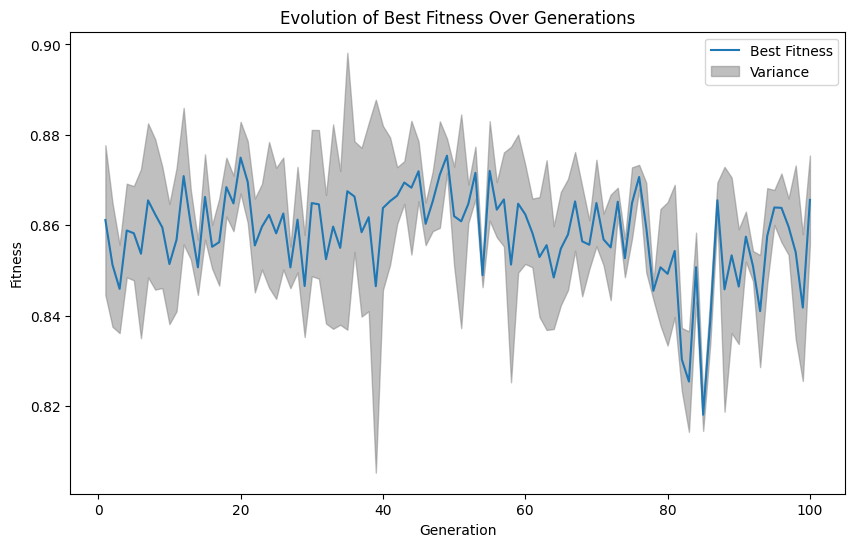

In [3]:
# Initialize variables for adaptive mutation
last_best_fitness = -1
increased_mutation_rate = 0.2

# Fitness function
def fitness(params):
    n_neighbors, min_dist, min_cluster_size, n_components = params
    
    # Validate n_neighbors
    n_neighbors = max(2, int(n_neighbors))  # Ensure n_neighbors is an integer and greater than 1
    
    min_cluster_size = max(2, int(min_cluster_size))
    n_components = max(2, int(n_components))
    min_dist = min(min_dist, 1.0)
    
    dataset_name, dataset = random.choice(list(datasets.items()))
    dataset = dataset.dropna()
    umap_result = perform_umap(dataset, n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    labels = perform_hdbscan(umap_result, min_cluster_size=min_cluster_size)
    score = calculate_silhouette(umap_result, labels)
    return score

# Datasets to consider
datasets = {'data_symp_groups_all': data_symp_groups_all}  # Replace with your actual dataset
print(f"number of features: {len(datasets['data_symp_groups_all'].columns)}")
# Genetic Algorithm Parameters
population_size = 120
n_generations = 100
selection_rate = 0.3
mutation_rate = 0.05

# Initialize population
population = []
for _ in range(population_size // 4):
    # First set of individuals (close to best performing genome)
    population.append((0.6492373060806188, 0.03733592291556887, 29, 47))
    population.append((0.6757706356698308, 0.04030749239323905, 38, 35))
    
    # Second set of individuals (random within a specific range)
    population.append((random.uniform(0.1, 5), random.uniform(0.045, 0.75), random.randint(30, 45), random.randint(8, 22)))
    population.append((random.uniform(6, 20), random.uniform(0.76, 1.0), random.randint(46, 50), random.randint(23, 25)))
    
    # Third set of individuals (another set close to best performing genome but with slight variations)
    population.append((0.6757706356698308 + random.uniform(-0.1, 0.1), 0.04030749239323905 + random.uniform(-0.01, 0.01), 29 + random.randint(-2, 2), 48 + random.randint(-2, 2)))
    population.append((0.6757706356698308 + random.uniform(-0.1, 0.1), 0.04030749239323905 + random.uniform(-0.01, 0.01), 38 + random.randint(-2, 2), 35 + random.randint(-2, 2)))

    # Fourth set of individuals (another set of random individuals)
    population.append((random.uniform(21, 35), random.uniform(0.26, 0.5), random.randint(21, 35), random.randint(25, 38)))
    population.append((random.uniform(36, 45), random.uniform(0.51, 0.75), random.randint(36, 45), random.randint(39, 65)))

# To store best fitness and variance for each generation
best_fitnesses = []
variances = []

# Main GA loop
for generation in tqdm(range(n_generations), desc="Generations"):
    # Evaluate fitness of each individual in parallel using joblib
    scores = Parallel(n_jobs=-1)(delayed(fitness)(ind) for ind in population)
    
    # Store best fitness and variance
    best_fitness = max(scores)
    best_fitnesses.append(best_fitness)
    variances.append(np.var(scores))
    
    # Adaptive mutation rate
    if best_fitness <= last_best_fitness:
        mutation_rate = increased_mutation_rate
    else:
        mutation_rate = 0.1
    last_best_fitness = best_fitness
    
    # Elitism: Keep the best individual
    best_idx = scores.index(best_fitness)
    best_individual = population[best_idx]
    
    # Print the top 5 individuals
    top5_idx = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:5]
    print(f"\nTop 5 individuals in generation {generation+1}:")
    for i in top5_idx:
        print(f"  Genome: {population[i]}, Fitness: {scores[i]}")
        print(f"    n_neighbors={population[i][0]}, min_dist={population[i][1]}, min_cluster_size={population[i][2]}, n_components={population[i][3]}")
    
    # Roulette wheel selection
    fitness_sum = sum(scores)
    selected_population = []
    for _ in range(int(selection_rate * population_size)):
        pick = random.uniform(0, fitness_sum)
        current = 0
        for i in range(len(scores)):
            current += scores[i]
            if current > pick:
                selected_population.append(population[i])
                break
    
    # Crossover (mate) the selected individuals
    children = []
    while len(children) < population_size - len(selected_population) - 1:
        parent1, parent2 = random.sample(selected_population, 2)
        crossover_point = random.randint(1, len(parent1) - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        children.append(child)
    
    # Mutation
    mutations = 0
    for i in range(len(children)):
        if random.random() < mutation_rate:
            mutations += 1
            mutate_pos = random.randint(0, len(children[i]) - 1)
            new_value = random.choice([
                random.randint(5, 50),
                random.uniform(0.0, 1.0),
                random.randint(5, 50),
                random.randint(2, 25)
            ])
            children[i] = children[i][:mutate_pos] + (new_value,) + children[i][mutate_pos+1:]
    
    print(f"Number of mutations: {mutations}")
    
    # Create new population
    population = selected_population + children

    # Add the best individual back into the population
    population.append(best_individual)

# Evaluate the final population and find the best individual
final_scores = Parallel(n_jobs=-1)(delayed(fitness)(ind) for ind in population)
best_idx = max(range(len(final_scores)), key=lambda i: final_scores[i])
best_individual = population[best_idx]

# Print best parameters and silhouette score
print("\nBest parameters found:")
print(f"  n_neighbors={best_individual[0]}, min_dist={best_individual[1]}, min_cluster_size={best_individual[2]}, n_components={best_individual[3]}")
print(f"Best silhouette score: {final_scores[best_idx]}")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_generations + 1), best_fitnesses, label='Best Fitness')
plt.fill_between(range(1, n_generations + 1), 
                np.array(best_fitnesses) - np.array(variances), 
                np.array(best_fitnesses) + np.array(variances), 
                color='gray', alpha=0.5, label='Variance')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of Best Fitness Over Generations')
plt.legend()
plt.show()
